In [ ]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving New_dataset.csv to New_dataset.csv


In [ ]:
df = pd.read_csv("New_dataset.csv")

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


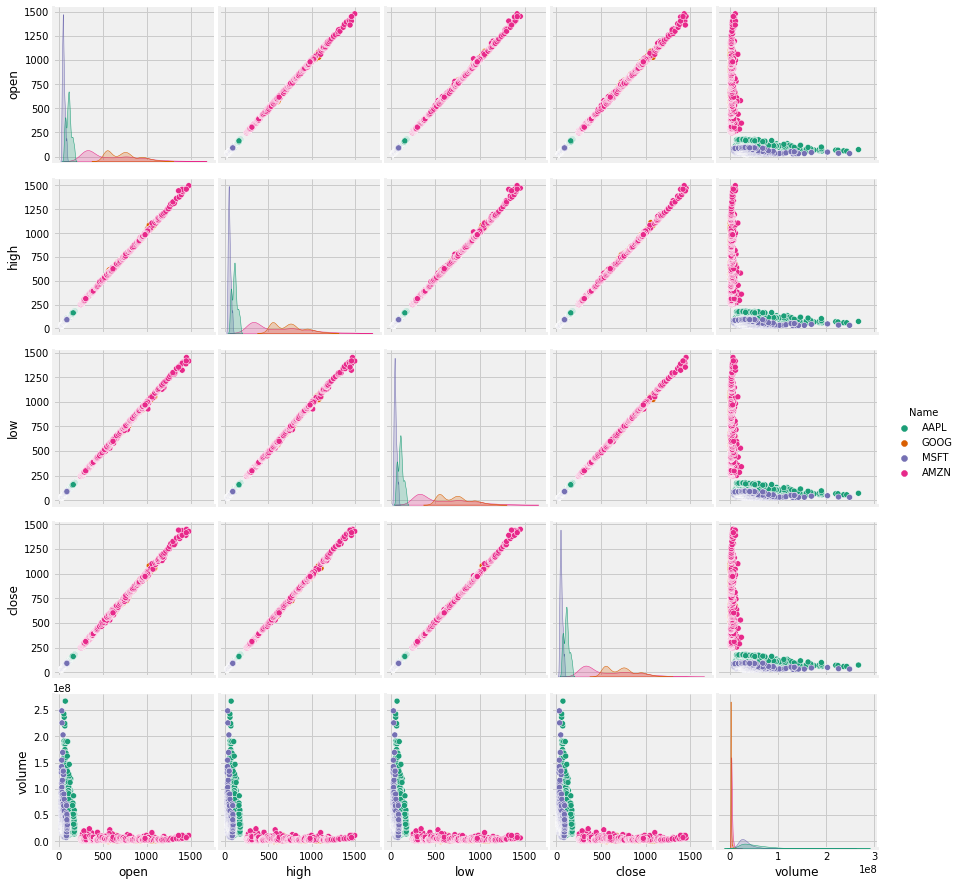

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='Name',palette='Dark2')
plt.savefig("HuePlot.jpg")

In [ ]:
new_df = df[df.Name=='AAPL']

In [ ]:
new_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [ ]:
new_df.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [ ]:
new_df.drop(['Name', 'open', 'high', 'low', 'volume'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_df.head()

,date,close
0,2013-02-08,67.8542
1,2013-02-11,68.5614
2,2013-02-12,66.8428
3,2013-02-13,66.7156
4,2013-02-14,66.6556


In [ ]:
from fastai.tabular import add_datepart

In [ ]:
add_datepart(new_df, "date")
new_df.drop("Elapsed", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)
/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been depre

In [ ]:
new_df.head()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,67.8542,2013,2,6,8,4,39,False,False,False,False,False,False
1,68.5614,2013,2,7,11,0,42,False,False,False,False,False,False
2,66.8428,2013,2,7,12,1,43,False,False,False,False,False,False
3,66.7156,2013,2,7,13,2,44,False,False,False,False,False,False
4,66.6556,2013,2,7,14,3,45,False,False,False,False,False,False


In [ ]:
new_df['mon_fri'] = 0
for i in range(0, len(new_df)):
  if new_df['Dayofweek'][i]==0 or new_df['Dayofweek'][i]==4:
    new_df['mon_fri'][i] = 1
  else:
    new_df['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
new_df.head()

,close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,67.8542,2013,2,6,8,4,39,False,False,False,False,False,False,1
1,68.5614,2013,2,7,11,0,42,False,False,False,False,False,False,1
2,66.8428,2013,2,7,12,1,43,False,False,False,False,False,False,0
3,66.7156,2013,2,7,13,2,44,False,False,False,False,False,False,0
4,66.6556,2013,2,7,14,3,45,False,False,False,False,False,False,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data
X = new_df.iloc[:, 1:]
y = new_df.iloc[:, 0:1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_rbf.score(X_test, y_test)

0.6140685439548978

In [ ]:
# Make predictions and find the rmse
rbf_preds = svr_rbf.predict(X_test)

rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(rbf_preds)), 2)))
print(rms)

38.78587546270777


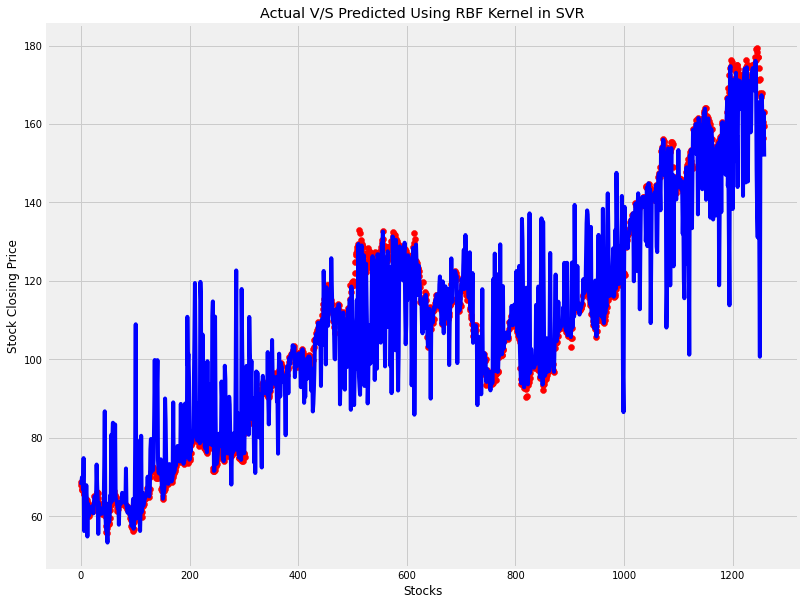

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(y.index, y, color='red')
plt.ylabel("Stock Closing Price")
plt.xlabel("Stocks")
plt.title("Actual V/S Predicted Using RBF Kernel in SVR")
plt.plot(y.index, svr_rbf.predict(X), color='blue')
plt.savefig("SVM_RBF-2.jpg")

In [ ]:
svr_linear = SVR(kernel='linear', C=10)
svr_linear.fit(X_train, y_train)
svr_linear.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7780514421175081

In [ ]:
# Make predictions and find the rmse
linear_preds = svr_linear.predict(X_test)

linear_rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(linear_preds)), 2)))
print(linear_rms)

42.155766588174465


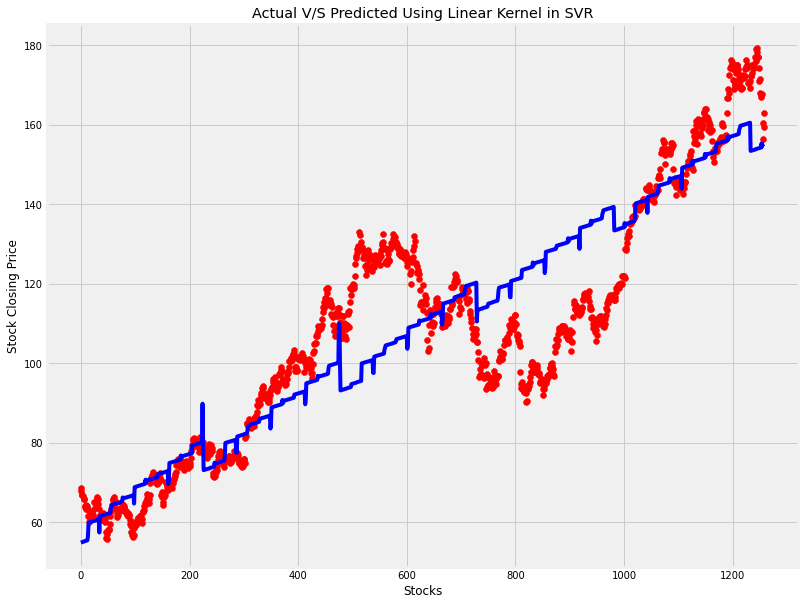

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(y.index, y, color='red')
plt.ylabel("Stock Closing Price")
plt.xlabel("Stocks")
plt.title("Actual V/S Predicted Using Linear Kernel in SVR")
plt.plot(y.index, svr_linear.predict(X), color='blue')
plt.savefig("SVM_Linear-1.jpg")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.9958311850044677

In [ ]:
# Make predictions and find the rmse
dt_preds = dt_model.predict(X_test)

linear_rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(dt_preds)), 2)))
print(linear_rms)

43.287520145951184


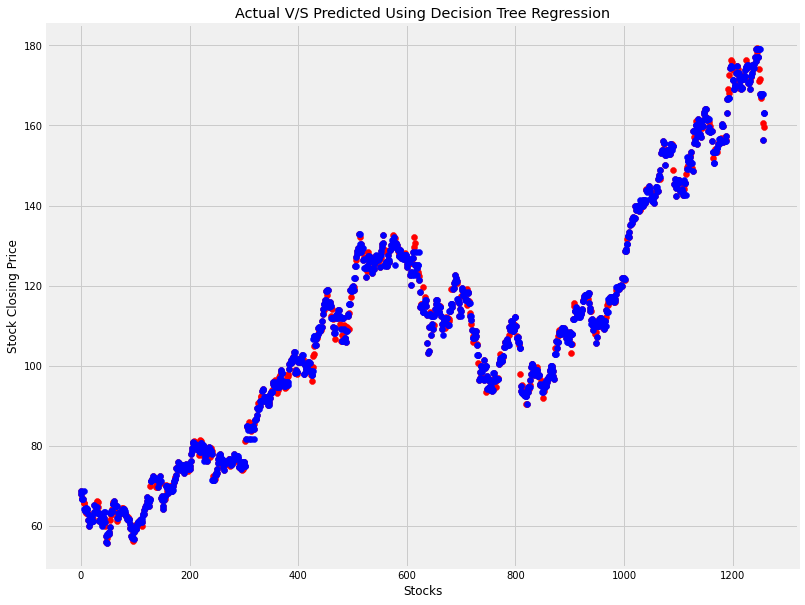

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(y.index, y, color='red')
plt.ylabel("Stock Closing Price")
plt.xlabel("Stocks")
plt.title("Actual V/S Predicted Using Decision Tree Regression")
plt.scatter(y.index, dt_model.predict(X), color='blue')
plt.savefig("DTR-2.jpg")